In [49]:
# Python's built-in sort() vs sorted()
# sort() = Performs in-place sort and returns None
x = [3, 1, 4, 2]
print(x.sort())
print(x)
# sorted() = Returns a new sorted list without modifying input
y = [3, 1, 4, 2]
print(sorted(y))
print(y)

None
[1, 2, 3, 4]
[1, 2, 3, 4]
[3, 1, 4, 2]


In [4]:
# NumPy functions for sorting
import numpy as np
x = np.array([2, 1, 4, 3, 5])
# Indexing is as follows
# 0 1 2 3 4
# 2 1 4 3 5
# sort() = Sorts the elements of an array in-place and return a sorted copy of the array
# Copy will be sorted
print(np.sort(x))
# Original will not be sorted
print(x)
# argsort() = Returns the indices of sorted elements
print(np.argsort(x))
# Using these indices as fancy indexing to sort array
i = np.argsort(x)
print(x[i])

[1 2 3 4 5]
[2 1 4 3 5]
[1 0 3 2 4]
[1 2 3 4 5]


In [8]:
# Sorting of 2D arrays
import numpy as np
M = np.random.randint(0, 50, (3,4))
print(M)
# Sort each column of matrix
print(np.sort(M, axis=0))
# Sort each row of matrix
print(np.sort(M, axis=1))

[[22 45 33 13]
 [12 15 16  0]
 [43 40 43 37]]
[[12 15 16  0]
 [22 40 33 13]
 [43 45 43 37]]
[[13 22 33 45]
 [ 0 12 15 16]
 [37 40 43 43]]


In [17]:
# Partial sort = When we want to find only k smallest elements of array and not sort the entire array (Order is arbitrary)
import numpy as np
# 1D array
x = np.array([7, 2, 1, 3, 6, 5, 4])
print(x)
# 3 smallest elements only
print(np.partition(x, 3))
# 2D array
M = np.random.randint(0, 100, (4,6))
print(M)
# Smallest 2 elements of each column
print(np.partition(M, 2, axis=0))
# Smallest 3 elements of each row
print(np.partition(M, 3, axis=1))

[7 2 1 3 6 5 4]
[1 2 3 4 5 6 7]
[[47 93 17 63 96 40]
 [57 76 34 24 34 77]
 [78  5 93 66 83 16]
 [63 41  5 95 40 82]]
[[47  5  5 24 34 16]
 [57 41 17 63 40 40]
 [63 76 34 66 83 77]
 [78 93 93 95 96 82]]
[[17 40 47 63 93 96]
 [24 34 34 57 76 77]
 [ 5 16 66 78 83 93]
 [ 5 40 41 63 82 95]]


In [23]:
# argpartition() = Indices of certain no. of smallest elements
import numpy as np
# 1D array
x = np.array([7, 2, 1, 3, 6, 5, 4])
print(x)
# Indices of smallest 3 elements
print(np.argpartition(x, 3))
# 2D array
M = np.random.randint(0, 100, (4,6))
print(M)
# Indices of smallest 2 elements of each column
print(np.argpartition(M, 2, axis=0))
# Indices of smallest 3 elements of each row
print(np.argpartition(M, 3, axis=1))

[7 2 1 3 6 5 4]
[2 1 3 6 5 4 0]
[[95 29 32 49 44 40]
 [18 53 12 28 98 78]
 [70 45 51 35 39 46]
 [70 46 65 32 21 54]]
[[1 0 1 1 3 0]
 [2 2 0 3 2 2]
 [3 3 2 2 0 3]
 [0 1 3 0 1 1]]
[[1 2 5 4 3 0]
 [2 0 3 1 5 4]
 [3 4 1 5 2 0]
 [4 3 1 5 2 0]]


**K-NEAREST NEIGHBOURS**

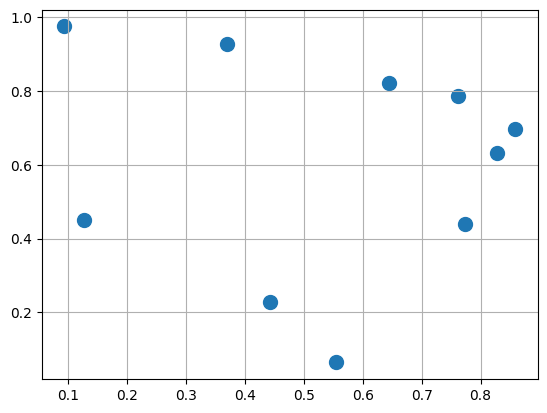

In [38]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng(seed=42)
# Create a 10 X 2 array of random values
X = rng.random((10, 2))
# Scatter plot
plt.scatter(X[:, 0], X[:, 1], s=100)
plt.grid(axis='both', alpha=1)

In [40]:
# Compute distance between each pair of points
dist_sqrd = np.sum((X[:, np.newaxis] - X[np.newaxis, :]) ** 2, axis=-1)
# For each pair of points, comput difference in their coordinates
differences = X[:, np.newaxis] - X[np.newaxis, :]
print(differences.shape)
# Square the coordinate difference
sq_differences = differences ** 2
print(sq_differences.shape)
# Sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
print(dist_sqrd.shape)
# Check whether diagonal is all 0s
print(dist_sqrd.diagonal())
# Sort along each row
nearest = np.argsort(dist_sqrd, axis=1)
print(nearest)
# Nearest k neighbours
K = 2
nearest_partition = np.argpartition(dist_sq, K+1, axis=1)

(10, 10, 2)
(10, 10, 2)
(10, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0 9 1 3 7 6 8 5 4 2]
 [1 9 3 6 0 5 7 8 4 2]
 [2 5 4 6 3 9 1 7 0 8]
 [3 6 1 9 0 5 7 2 4 8]
 [4 7 2 5 8 6 0 3 9 1]
 [5 2 6 3 4 1 9 0 7 8]
 [6 3 1 9 5 0 2 7 4 8]
 [7 8 4 0 9 1 6 3 5 2]
 [8 7 0 4 9 1 3 6 5 2]
 [9 1 3 0 6 5 7 8 4 2]]


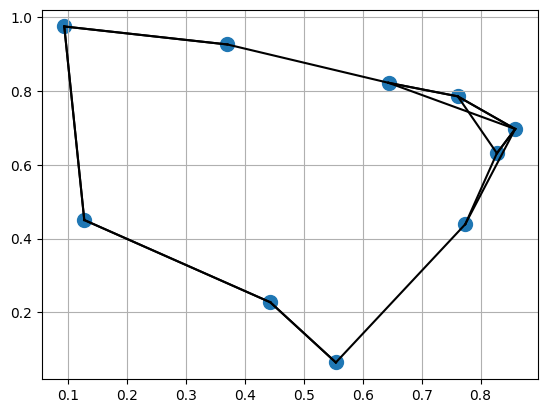

In [43]:
# Visualization
plt.scatter(X[:, 0], X[:, 1], s=100)
plt.grid(axis='both', alpha=1)
# Draw lines for each point to its nearest two neighbours
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # Plot a line from X[i] to X[j]
        # Use some zip magic to make it happen
        plt.plot(*zip(X[j], X[i]), color='black')